In [1]:
%load_ext autoreload
%autoreload 2

import os
import yaml
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate

# load experiment parameters
with open(os.path.join('..', 'params.yaml'), 'r') as fd:
    params = yaml.safe_load(fd)

In [2]:
# load raw data
tables_all = []
with np.load(os.path.join('..', 'out', 'data_raw.npz')) as data:
    for i in range(1,11):
        tables_all.append(data['C%d'%i])

C1.csv


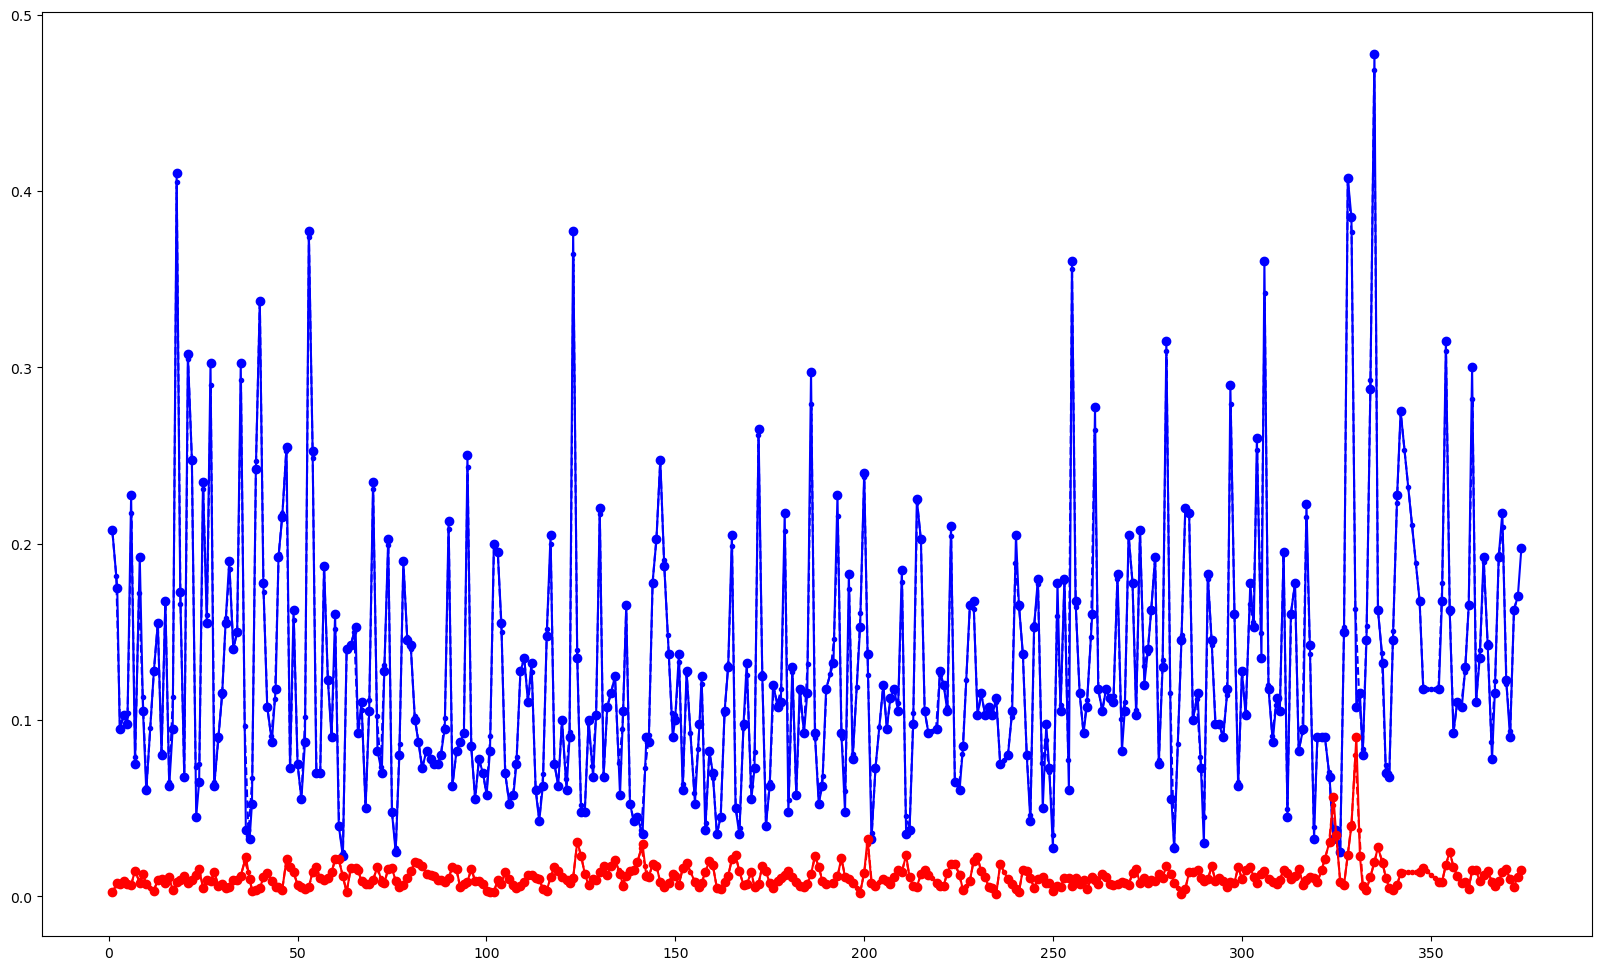

C2.csv


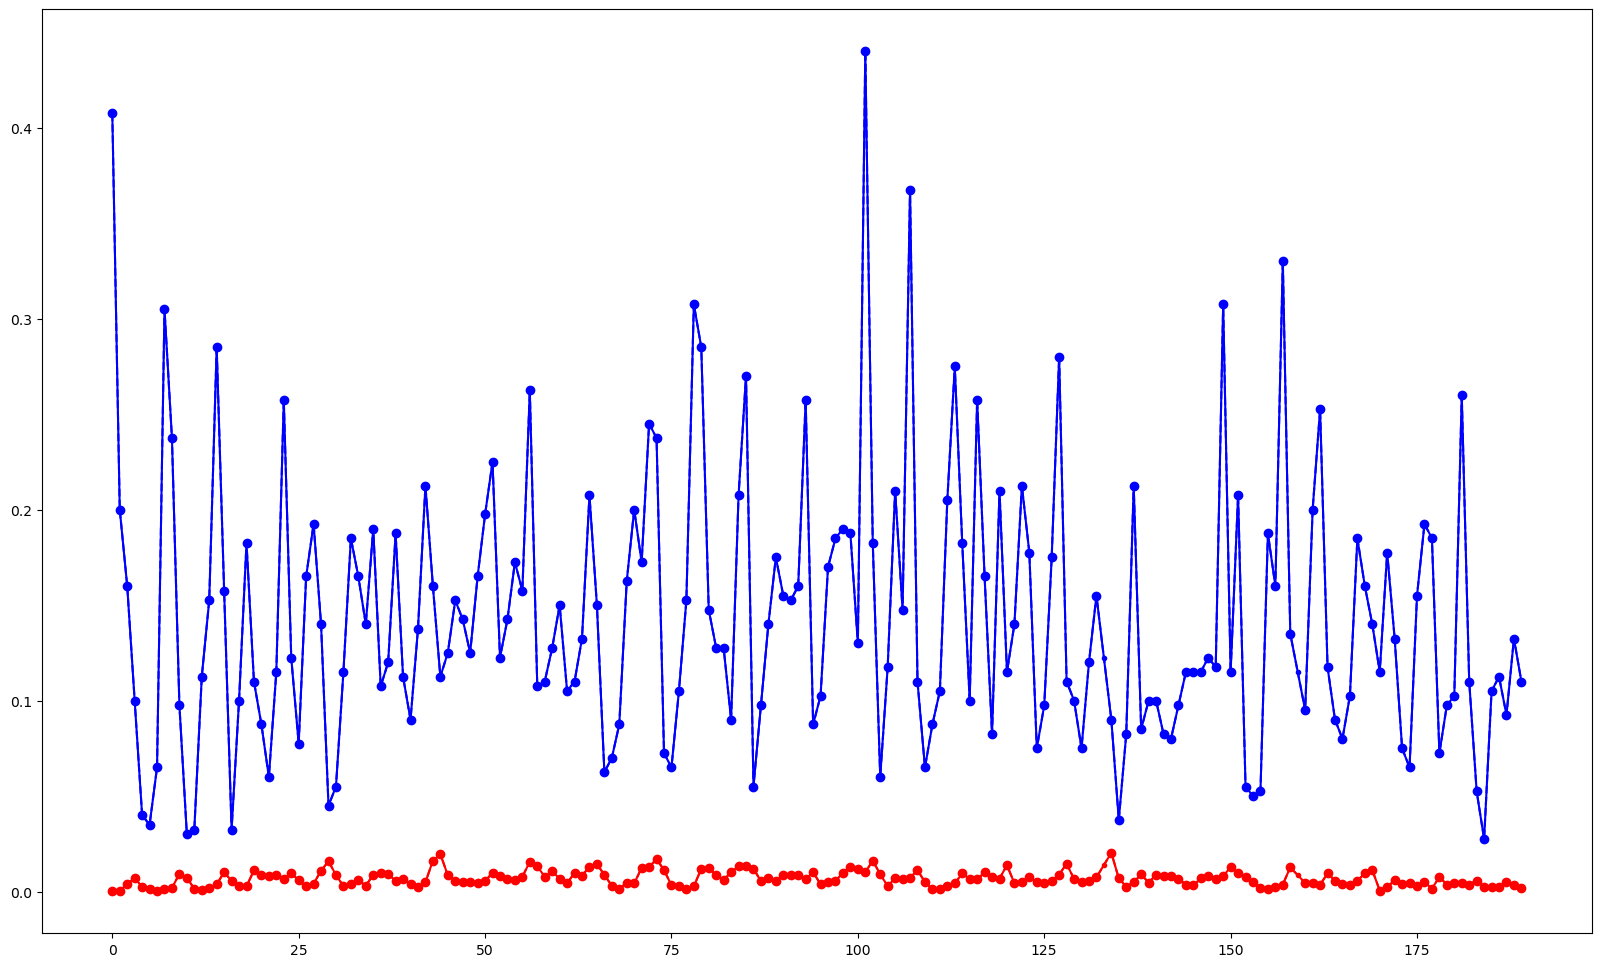

C3.csv


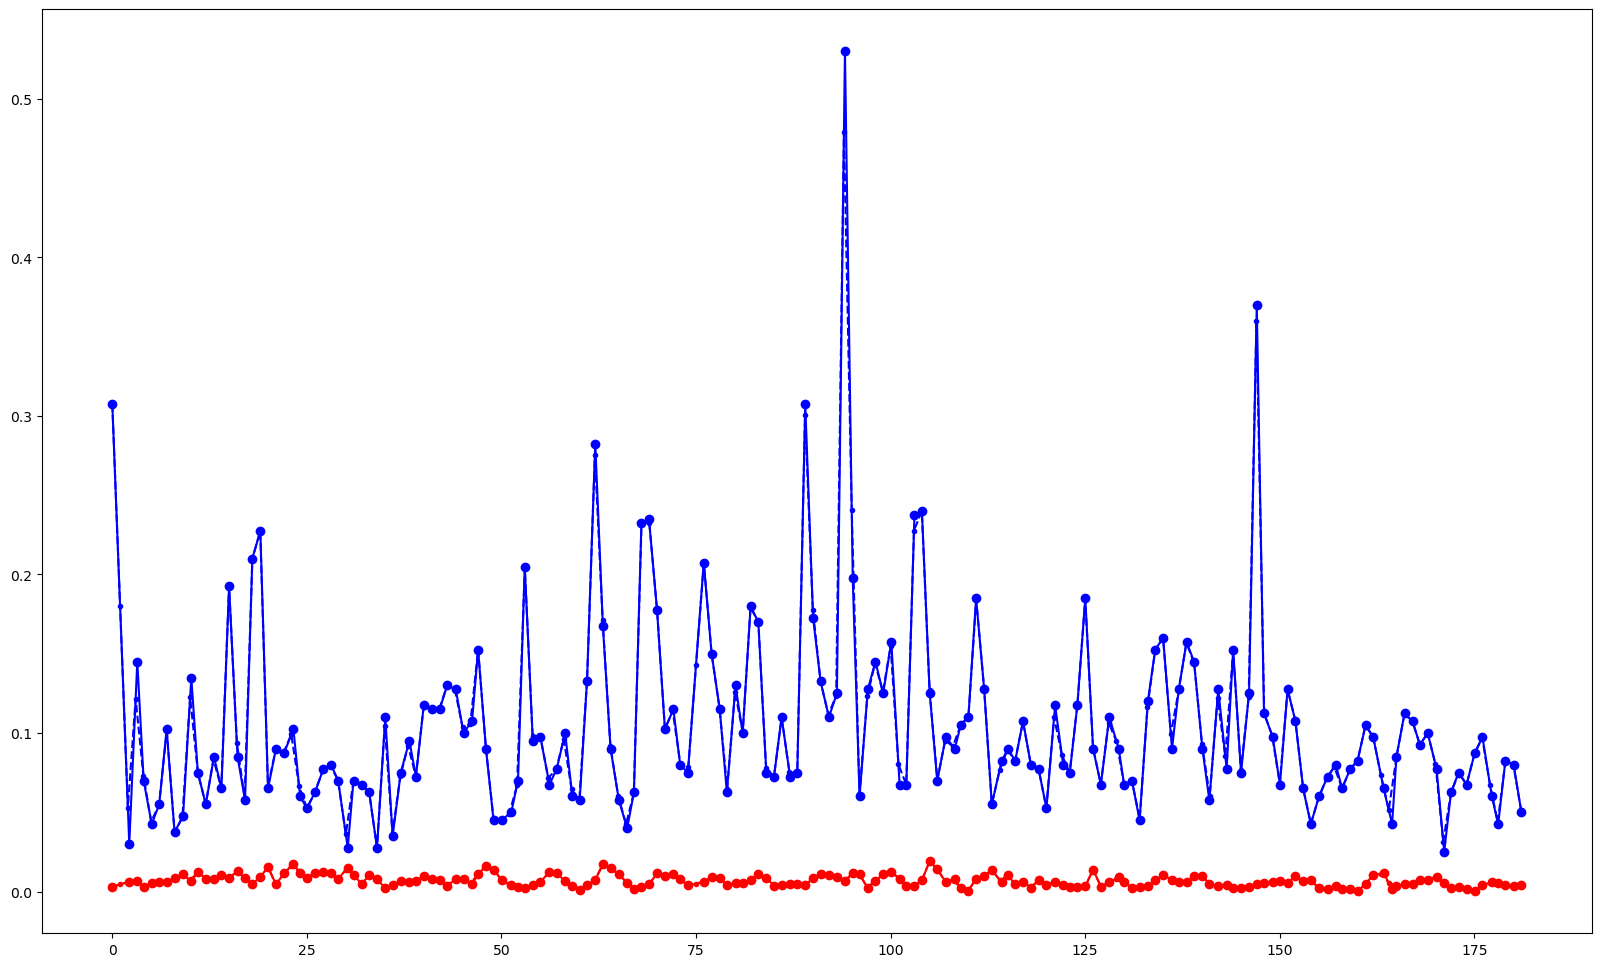

C4.csv


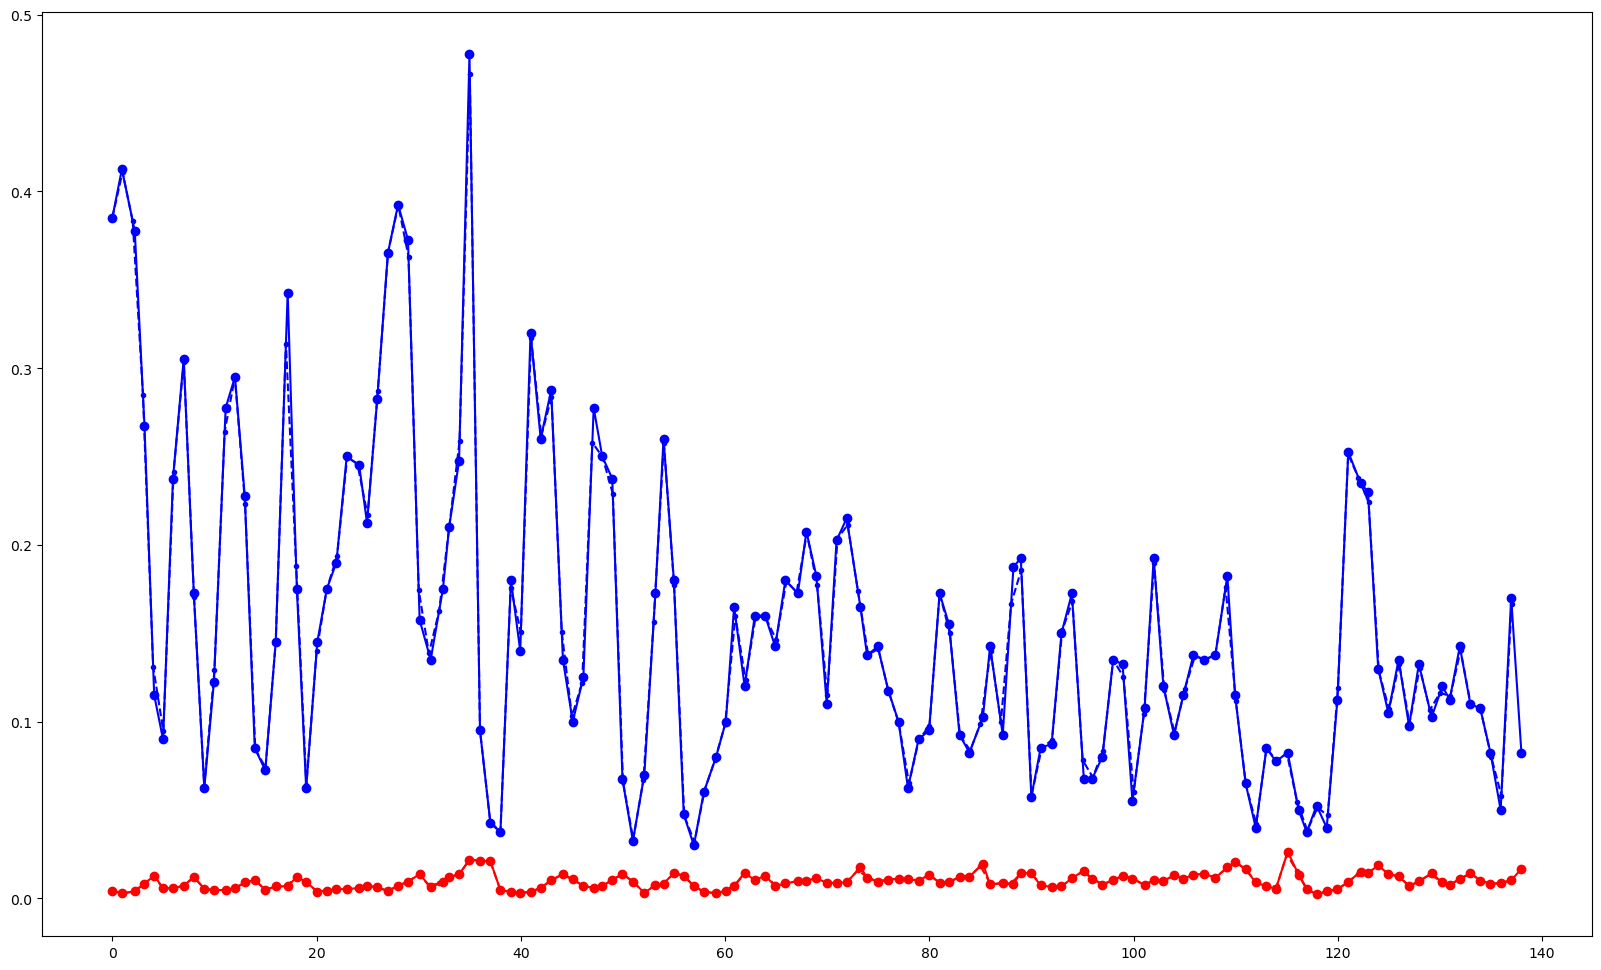

C5.csv


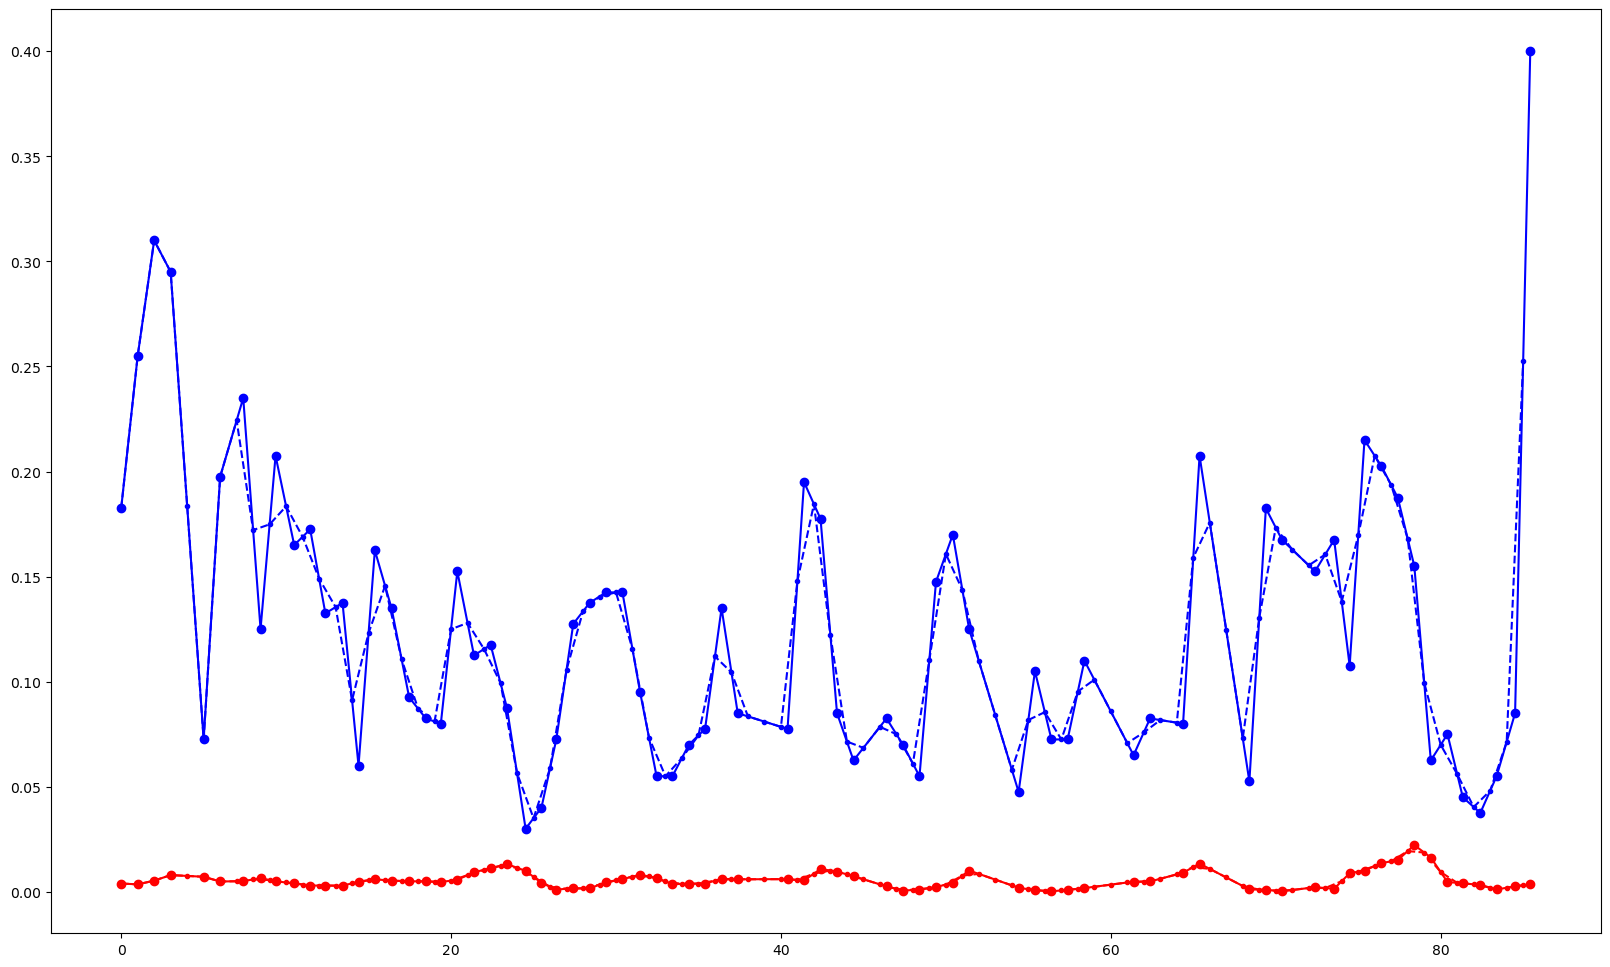

C6.csv


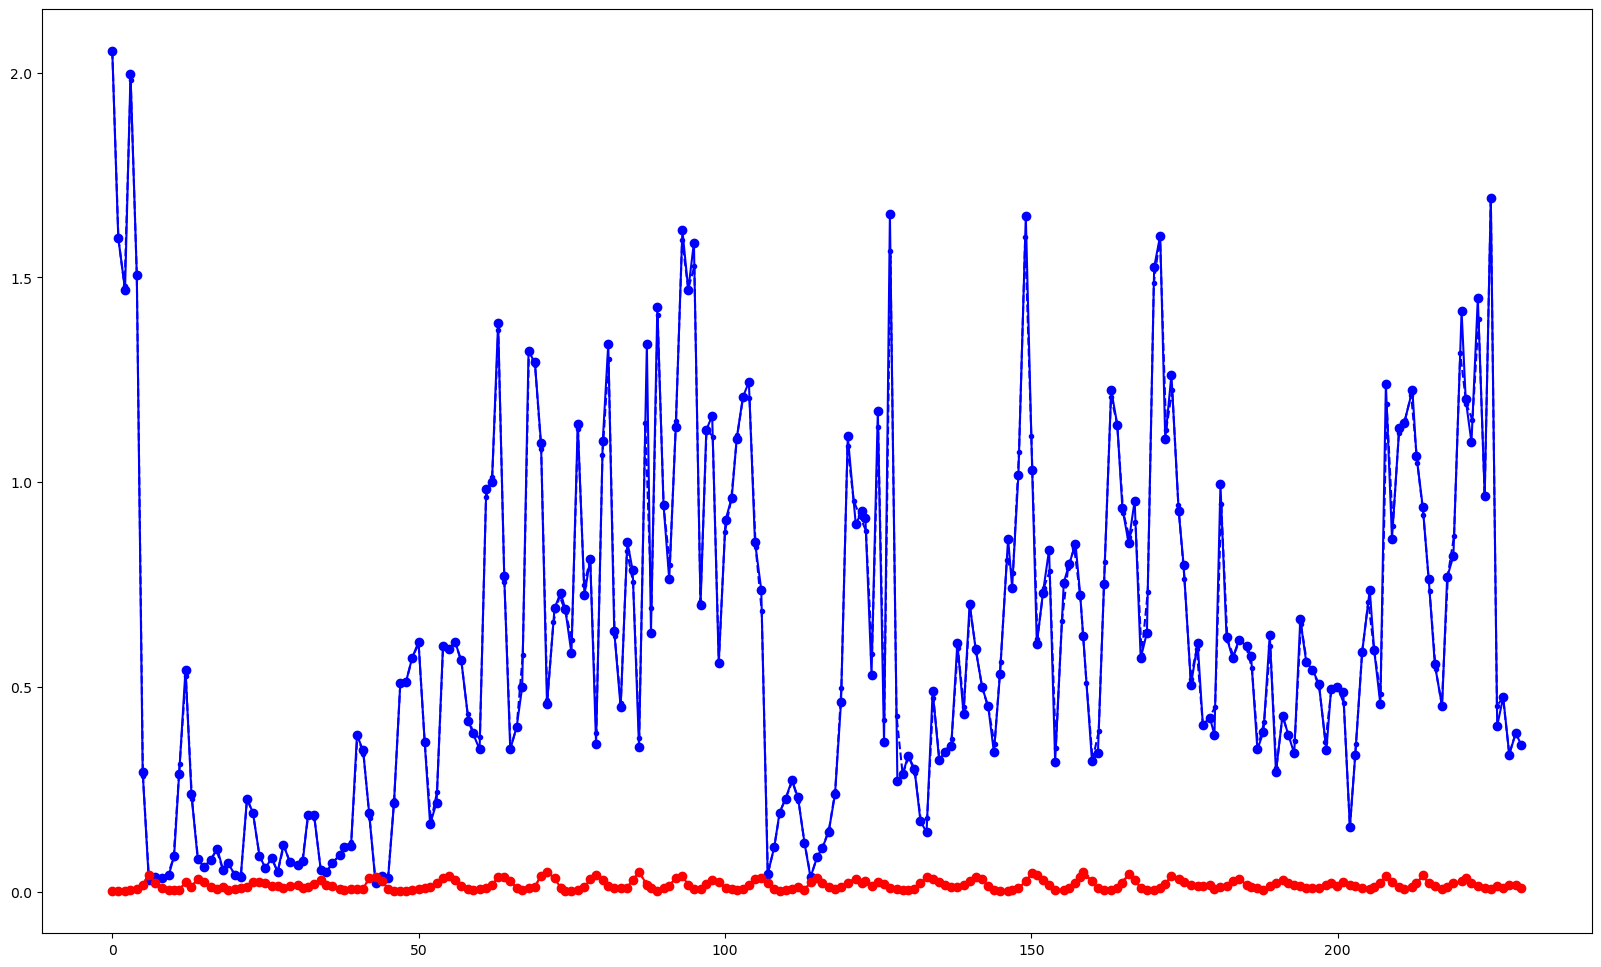

C7.csv


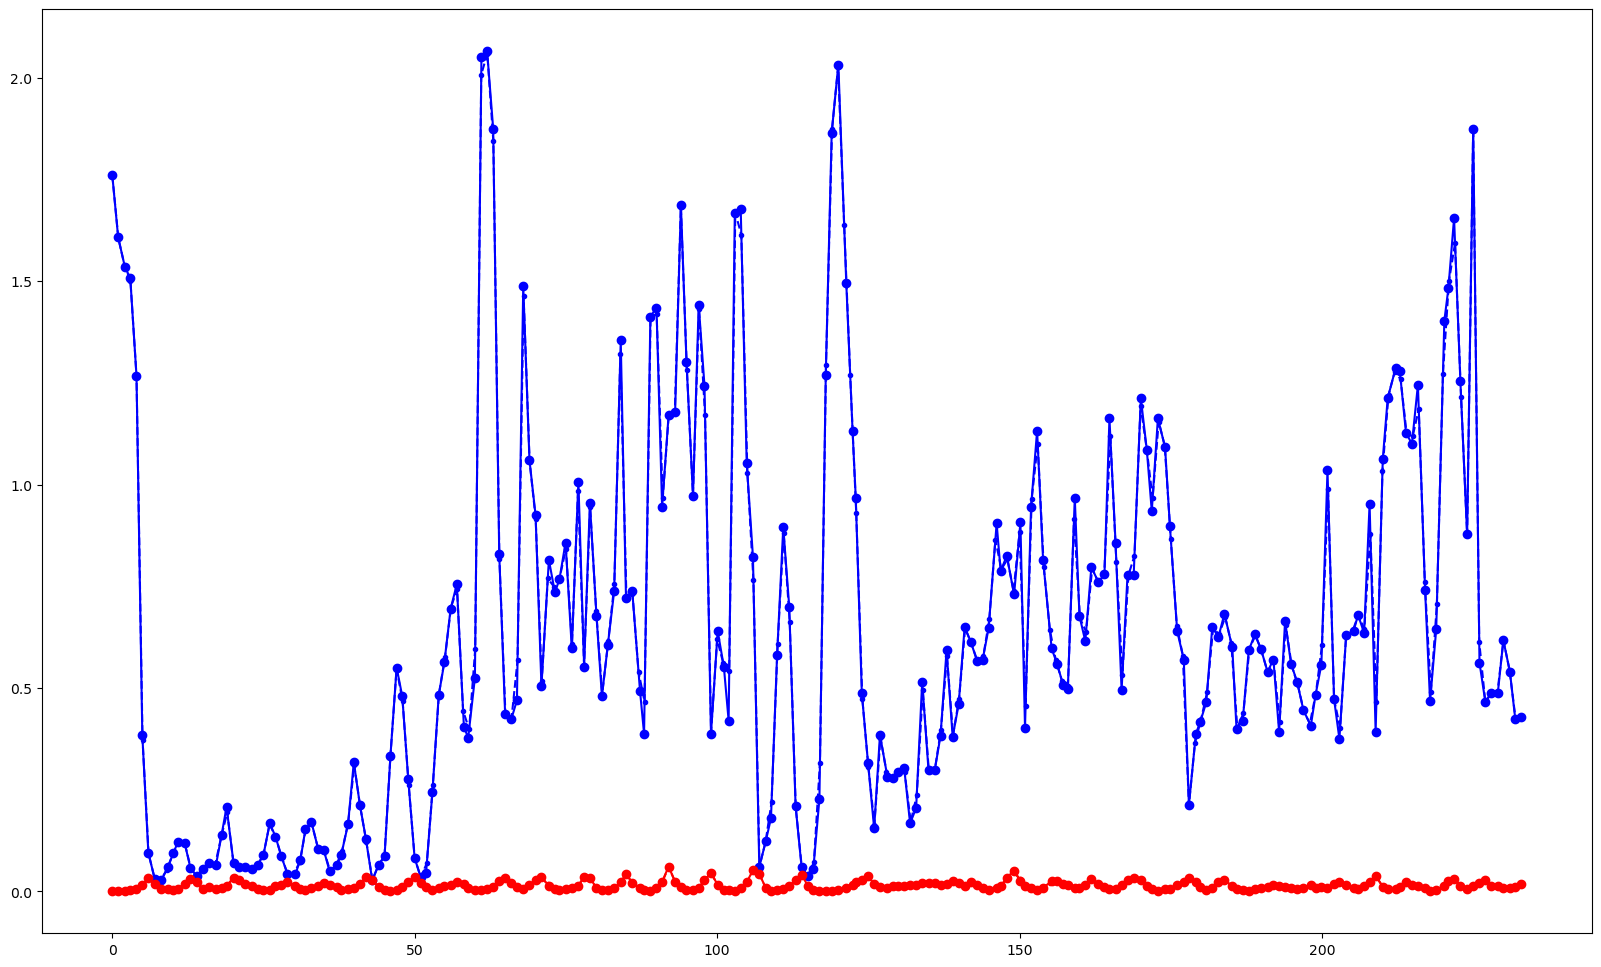

C8.csv


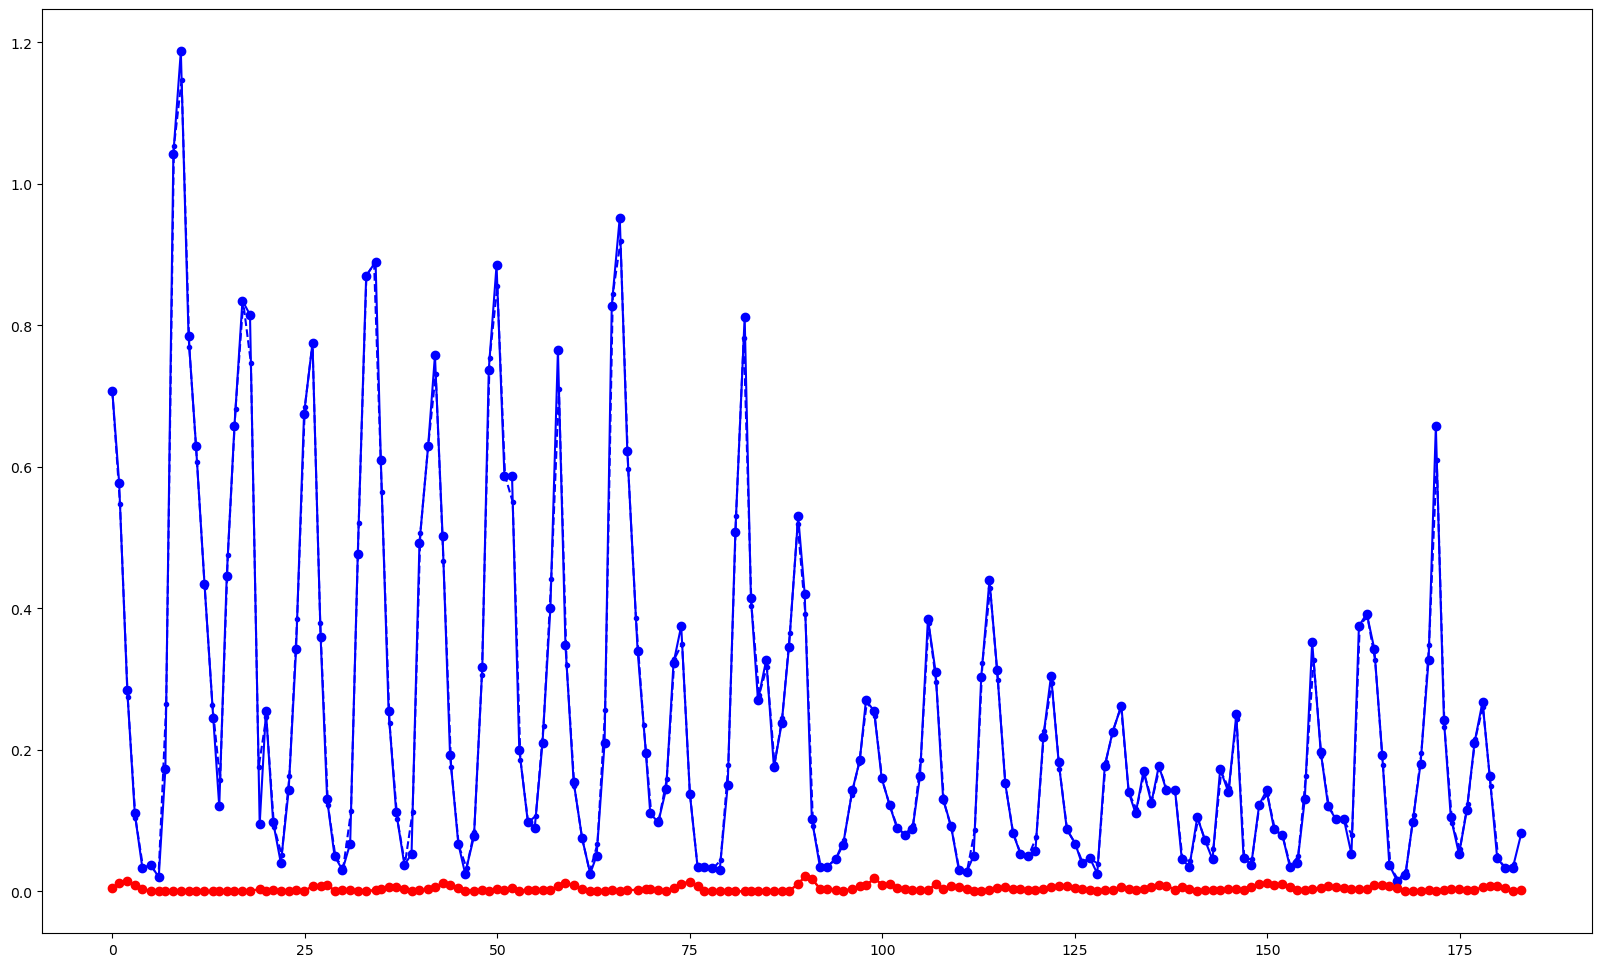

C9.csv


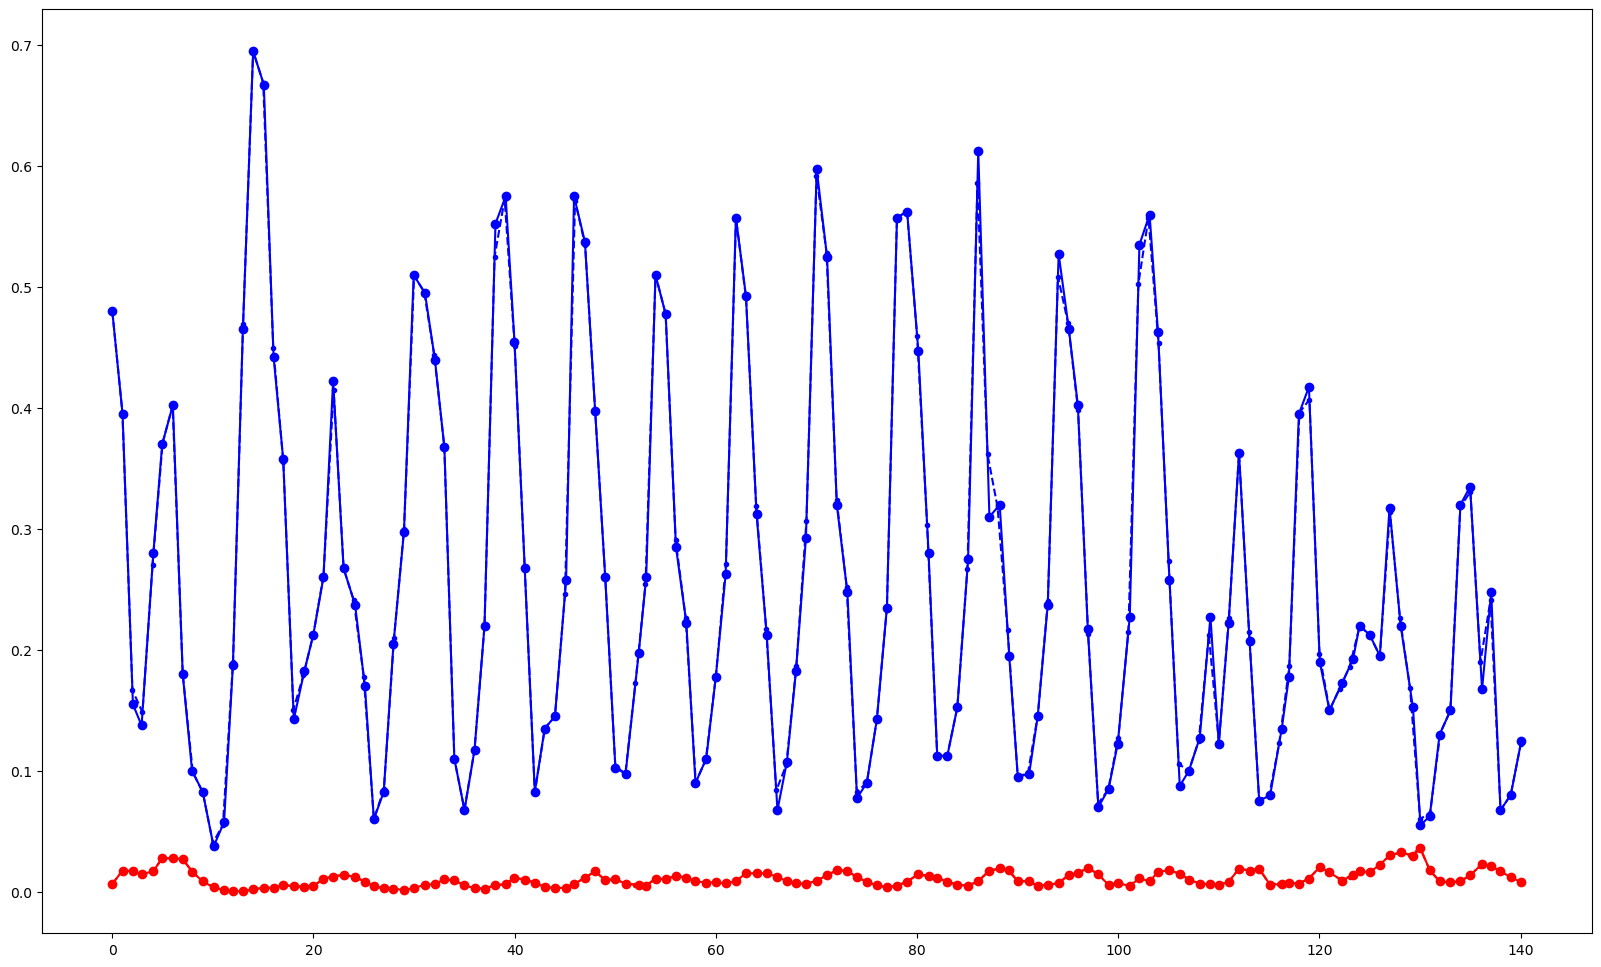

C10.csv


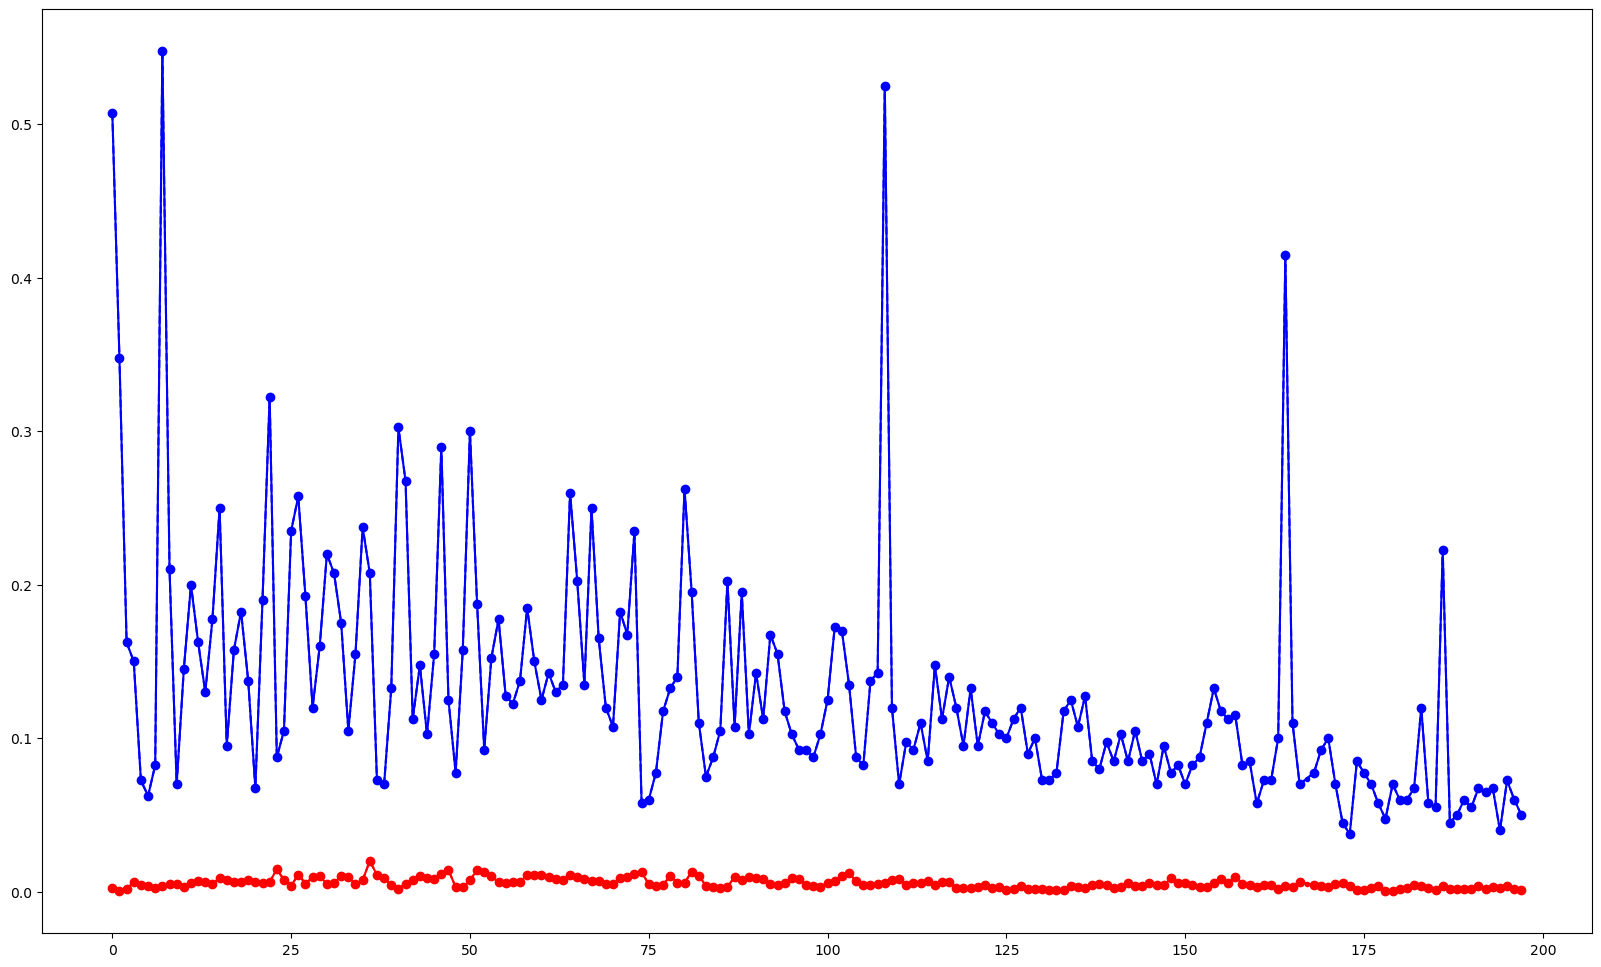

In [3]:
for i in range(10):
    print('C%d.csv'%(i+1))

    # eliminate rows with nan
    table = np.array(tables_all[i])[:,0:3]
    table = table[~np.isnan(table).any(axis=1)]

    # interpolation
    interp = interpolate.interp1d(table[:,0], table[:,1:], kind='linear', axis=0)
    first = np.ceil(table[0,0])
    last = np.floor(table[-1,0])
    t_interpolated = np.linspace(first, last, int(last-first)+1)
    table_interpolated = np.concatenate([t_interpolated[:,np.newaxis], interp(t_interpolated)], axis=1)

    fig, ax = plt.subplots(1, figsize=(20,12))
    ax.plot(table[:,0], table[:,1]/2, 'bo-')
    ax.plot(table_interpolated[:,0], table_interpolated[:,1]/2, 'b.--')
    ax.plot(table[:,0], table[:,2]/50, 'ro-')
    ax.plot(table_interpolated[:,0], table_interpolated[:,2]/50, 'r.--')
    plt.show()
